# Predicting Heart Disease

Image

Author: Xiaohua Su

Date: May 17th, 2022

# Overview

As of 2020, heart disease is the leading cause of death in the US, with the disease claiming close to 700,000 that year. It is the leading cause of death regardless of gender and for most race/ethnicity. This disease can lead to early death in individuals, increase medicial visits and a lost of productivity in our economy. As such, it is important to try to address this.


# Business Problem

With how prevalent heart disease is in the nation, it is important for doctors to discuss with their patients about early prevention. In order to do this, doctors would need to know more about a patient’s history in order to diagnose them with having heart disease, potentially requiring blood work in addition. Getting the results from the blood work usually happens after the patient’s is already out of the doctor’s office. Calls will then be made to discuss these results and potential follow up appointments will be made. 

Our model aims to predict whether a patient, who comes into a doctor’s office/hospital, has heart disease. By being able to predict if the patient has heart disease or not, we can then flag this patient for the doctor electronically. Instead of having to waiting for a phone call for a discussion on, that may not be between the patient and doctor, conversation between the doctor and patient about managing heart disease can begin. This flagging can help start the conversation between the doctor and patient about early prevention steps that can be made and can help lead the doctor in asking certain questions for further verification and testing.

# Data

The data was taken from the [CDC's 2020 Behavorial Risk Factor Surveillance System](https://www.cdc.gov/brfss/annual_data/annual_2020.html) (BRFSS). Due to how large the data is, this data was not uploaded to the github but can be found where the data was taken underneath the data files section.

It is a survey data performed between 2020 to 2021 from the CDC to monitor people's health-behavior, chronic health conditions, and use of services to help manage their disease. The data contains information of the individual such as `race` and `gender` that we will not use to avoid these biases in our models. A new column was created as the data does not specifically have a column called heart disease but instead has two two columns called `cvdinfr4` and `cvdcrhd4` that corresponded with whether the individual was ever told/diagnose with having a heart attack and told that they had coronary heart disease. Both questions, get at the issue of heart disease.

# Imports and Loading in Data 

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, \
ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score, roc_auc_score, plot_roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

from model import *
import joblib

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
heart_df = pd.read_csv('./Data/heart_df.csv')

In [4]:
heart_df

,Unnamed: 0,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,heart_disease
0,0,1.0,2.0,3.0,30.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,48.0,170.0,2.0,1.0,3.0,0.0,2.0,1.0,0.0
1,1,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,NaN,163.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0
2,2,1.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,NaN,173.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
3,4,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,NaN,57.0,168.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
4,5,1.0,4.0,20.0,30.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,4.0,3.0,8.0,5.0,82.0,175.0,2.0,1.0,1.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331523,401953,72.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,99.0,55.0,150.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331524,401954,72.0,3.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,76.0,152.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331525,401955,72.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,72.0,124.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331526,401956,72.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,99.0,80.0,173.0,2.0,7.0,3.0,4.0,2.0,NaN,0.0


In [5]:
heart_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
heart_df

,state,general_health,physical_health,mental_health,health_insurance,health_care_doctors,no_doc_bc_cost,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,education_lvl,rent_own,employment_status,income_level,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret,heart_disease
0,1.0,2.0,3.0,30.0,2.0,3.0,1.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,6.0,1.0,4.0,1.0,48.0,170.0,2.0,1.0,3.0,0.0,2.0,1.0,0.0
1,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,7.0,99.0,NaN,163.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0
2,1.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,5.0,1.0,7.0,7.0,NaN,173.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
3,1.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,2.0,7.0,NaN,57.0,168.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0
4,1.0,4.0,20.0,30.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,4.0,3.0,8.0,5.0,82.0,175.0,2.0,1.0,1.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331523,72.0,3.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,5.0,1.0,1.0,99.0,55.0,150.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331524,72.0,3.0,0.0,0.0,1.0,1.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,5.0,4.0,76.0,152.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331525,72.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,1.0,5.0,1.0,72.0,124.0,2.0,2.0,3.0,0.0,2.0,NaN,0.0
331526,72.0,3.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,6.0,1.0,1.0,99.0,80.0,173.0,2.0,7.0,3.0,4.0,2.0,NaN,0.0


In [7]:
#makes no sense to have due to business problem
heart_df.drop(columns = ['education_lvl', 'income_level', 'employment_status', 'rent_own', 'health_care_doctors', \
                         'no_doc_bc_cost'], inplace = True)

In [8]:
X = heart_df.drop(columns = ['heart_disease', 'state'])
y = heart_df.heart_disease

# Preprocessing and Model Prep

In [9]:
#train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y , random_state = 42)

In [10]:
y_train.value_counts(normalize = True)

0.0    0.915426
1.0    0.084574
Name: heart_disease, dtype: float64

Our target is heavily imbalance. As such I will need to SMOTE and use the imblearn version of pipelines. I will smote up to 15%. 

#### Column Transformers

column transformer Pipelines will be built to prevent data leakage when we are doing cross validation as we need to scale and one-hot-encode our features. Different column transformers will be made as we will see how our model does with different amount of features.

In [11]:
X_train

,general_health,physical_health,mental_health,health_insurance,last_checkup,excercise_30,sleep,stroke,asthma,skin_cancer,other_cancer,copd_type_issue,arthritis_anyform,depressive_disorder,kidney_disease,diabetes,weight_kg,height_m,difficulty_walking,smoke100_lifetime,smokeless_tobacco_products,alcohol_consumption_30,high_risk_situations,ecigaret
248413,1.0,0.0,0.0,1.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,73.0,165.0,2.0,2.0,3.0,5.0,2.0,2.0
91003,3.0,0.0,0.0,1.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,55.0,175.0,2.0,2.0,3.0,0.0,2.0,NaN
148075,1.0,0.0,10.0,1.0,2.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,50.0,168.0,2.0,2.0,3.0,4.0,2.0,2.0
273325,3.0,0.0,0.0,2.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,55.0,152.0,2.0,2.0,3.0,0.0,2.0,2.0
193206,1.0,0.0,0.0,1.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,62.0,165.0,2.0,2.0,3.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298694,1.0,0.0,0.0,1.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,82.0,168.0,2.0,2.0,3.0,30.0,2.0,2.0
82524,3.0,15.0,0.0,1.0,1.0,2.0,7.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,2.0,3.0,100.0,160.0,1.0,1.0,3.0,0.0,2.0,NaN
289919,2.0,0.0,0.0,1.0,1.0,1.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,68.0,168.0,2.0,2.0,3.0,2.0,2.0,2.0
130280,5.0,5.0,5.0,1.0,1.0,1.0,6.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,91.0,175.0,2.0,2.0,3.0,0.0,2.0,NaN


In [12]:
X_train.physical_health.value_counts()

0.0     172226
30.0     15644
2.0      11154
1.0       7804
3.0       6586
5.0       5716
10.0      4157
15.0      3970
7.0       3564
4.0       3368
20.0      2511
14.0      2236
6.0        928
25.0       901
99.0       728
8.0        704
21.0       479
12.0       465
28.0       361
29.0       159
18.0       126
16.0       103
27.0       102
17.0        81
11.0        75
13.0        66
22.0        59
26.0        58
24.0        55
23.0        36
19.0        27
Name: physical_health, dtype: int64

In [13]:
continous = ['physical_health', 'mental_health', 'last_checkup' , 'excercise_30', 'sleep', 'weight_kg', \
               'height_m', 'alcohol_consumption_30']

categorical = list(X.columns.drop(continous))

In [14]:
categorical

['general_health',
 'health_insurance',
 'stroke',
 'asthma',
 'skin_cancer',
 'other_cancer',
 'copd_type_issue',
 'arthritis_anyform',
 'depressive_disorder',
 'kidney_disease',
 'diabetes',
 'difficulty_walking',
 'smoke100_lifetime',
 'smokeless_tobacco_products',
 'high_risk_situations',
 'ecigaret']

In [15]:
cat_pipe = Pipeline(steps=[('cat_impute', IterativeImputer(estimator = KNeighborsClassifier(),\
                                                           random_state=42, max_iter = 5)),
                              ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
scale_pipe = Pipeline(steps=[('scale_impute', IterativeImputer(estimator = BayesianRidge(),random_state=42)),
                              ('scale', MinMaxScaler())])

In [16]:
#ct for only continous
ct_continous = ColumnTransformer(transformers=[
    ('scale', scale_pipe, continous)
])

#ct for categorical only
ct_categorical = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical),
])

#ct with both continous and categorical
ct = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical),
    ('scale', scale_pipe, continous)
])

# Simple Models

## Dummy Classifier

In [17]:
X_simple = X_train[continous]
y_simple = y_train

X_simple

,physical_health,mental_health,last_checkup,excercise_30,sleep,weight_kg,height_m,alcohol_consumption_30
248413,0.0,0.0,2.0,1.0,6.0,73.0,165.0,5.0
91003,0.0,0.0,1.0,1.0,6.0,55.0,175.0,0.0
148075,0.0,10.0,2.0,1.0,6.0,50.0,168.0,4.0
273325,0.0,0.0,1.0,1.0,8.0,55.0,152.0,0.0
193206,0.0,0.0,1.0,1.0,8.0,62.0,165.0,4.0
...,...,...,...,...,...,...,...,...
298694,0.0,0.0,1.0,1.0,8.0,82.0,168.0,30.0
82524,15.0,0.0,1.0,2.0,7.0,100.0,160.0,0.0
289919,0.0,0.0,1.0,1.0,8.0,68.0,168.0,2.0
130280,5.0,5.0,1.0,1.0,6.0,91.0,175.0,0.0


In [18]:
dummy_simple = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('dummy', DummyClassifier(strategy='most_frequent'))
]).fit(X_simple, y_simple)

In [19]:
dummy_info = ModelWithCV(dummy_simple, 'dummy', X_simple, y_simple)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 
  f1_score is 0.0 CV Results for `dummy` model:
            0.91543 ± 0.00001 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000021F8FC31B50> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000021F8FAFF0D0>


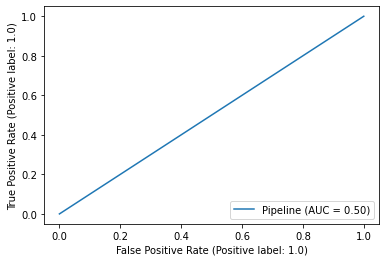

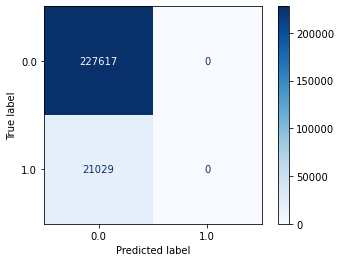

In [20]:
dummy_info.print_summary()

## Simple Model 1 - Logistic Regression

In [21]:
log1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('log',LogisticRegression(random_state=42))
]).fit(X_simple, y_simple)

In [22]:
log1_info = ModelWithCV(log1, 'log1', X_simple, y_simple)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 
  f1_score is 0.07236090716266927 CV Results for `log1` model:
            0.90832 ± 0.00071 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000021F914955B0> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000021F8FBB9FD0>


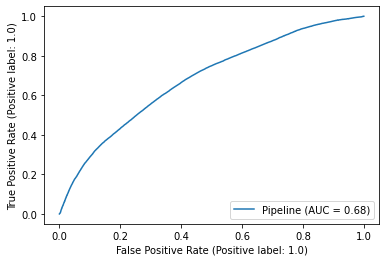

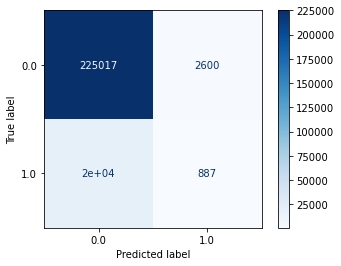

In [23]:
log1_info.print_summary()

The LogisticRegression has a better F1 score of .14 compared to the dummy classifier which had a F1 score of 0. The ROC-AUC score is also better by 0.19. The AUC of the logistic regression is 0.69 while the dummy was 0.50. However, the accuracy is slightly lower by 1-2% on the logistic regression (90%) compared to the dummy (92%).

In [24]:
log_pca = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('pca', PCA(n_components=.9)),
    ('log',LogisticRegression(random_state=42))
]).fit(X_simple, y_simple)

In [25]:
log_pca_info = ModelWithCV(log_pca, 'log_pca', X_simple, y_simple)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 
  f1_score is 0.0036728351462070913 CV Results for `log_pca` model:
            0.91489 ± 0.00011 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000021F8FAFF3A0> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000021F8FD76A30>


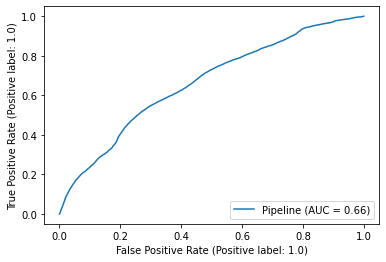

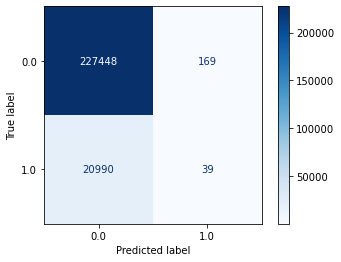

In [26]:
log_pca_info.print_summary()

## Simple Model 2 - KNN

In [27]:
knn1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('knn1',KNeighborsClassifier())
]).fit(X_simple, y_simple)

In [28]:
knn1_info = ModelWithCV(knn1, 'knn', X_simple, y_simple)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 
  f1_score is 0.4918121532007037 CV Results for `knn` model:
            0.84951 ± 0.00154 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000021F935E0760> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000021F8F709490>


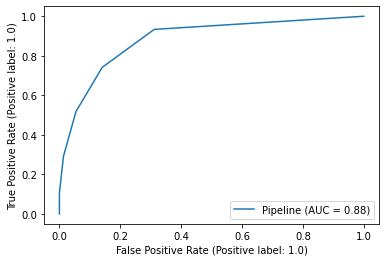

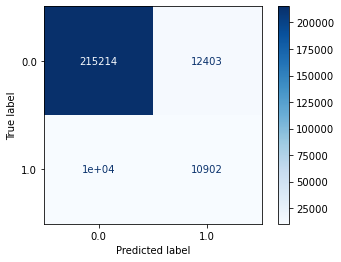

In [29]:
knn1_info.print_summary()

The KNN did much better compared to the logistic regression. It has a F1 score of about .50 compared to the logistic regression (0.14). The ROC-AUC is also much better at 0.89 versus 0.69. The accuracy is much lower though, dropping to about 84% compare to 90% from the logistic or even the dummy which was about 92%.

## Simple Model 3 - Decision Tree

In [30]:
dtree1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('dtree', DecisionTreeClassifier(random_state=42) )
]).fit(X_simple, y_simple)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 
  f1_score is 0.8044500069531358 CV Results for `dtree1` model:
            0.85559 ± 0.00136 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000021F93BC82B0> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000021F93B6EE50>


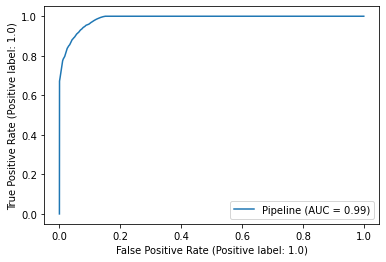

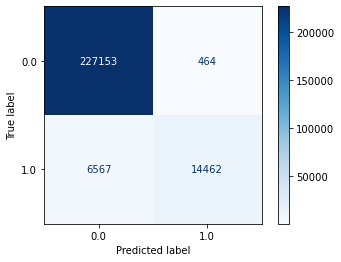

In [31]:
dtree1_info = ModelWithCV(dtree1, 'dtree1', X_simple, y_simple)
dtree1_info.print_summary()

Our decision tree performed much better with an F1 score of 0.80, ROC-AUC of 0.99 but with an accuracy of 86%. Though, the ROC-AUC being 0.99 indicates that it is more than likely overfit and as such we will have to take that into account.

In [32]:
X_simple

,physical_health,mental_health,last_checkup,excercise_30,sleep,weight_kg,height_m,alcohol_consumption_30
248413,0.0,0.0,2.0,1.0,6.0,73.0,165.0,5.0
91003,0.0,0.0,1.0,1.0,6.0,55.0,175.0,0.0
148075,0.0,10.0,2.0,1.0,6.0,50.0,168.0,4.0
273325,0.0,0.0,1.0,1.0,8.0,55.0,152.0,0.0
193206,0.0,0.0,1.0,1.0,8.0,62.0,165.0,4.0
...,...,...,...,...,...,...,...,...
298694,0.0,0.0,1.0,1.0,8.0,82.0,168.0,30.0
82524,15.0,0.0,1.0,2.0,7.0,100.0,160.0,0.0
289919,0.0,0.0,1.0,1.0,8.0,68.0,168.0,2.0
130280,5.0,5.0,1.0,1.0,6.0,91.0,175.0,0.0


In [33]:
#rf
rf1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('rf1', RandomForestClassifier(random_state=42) )
]).fit(X_simple, y_simple)

In [34]:
rf1_info = ModelWithCV(rf1, 'rf1', X_simple, y_simple)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 
  f1_score is 0.8096406330035316 CV Results for `rf1` model:
            0.89427 ± 0.00138 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000021F93CB9D30> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000021F93B93A00>


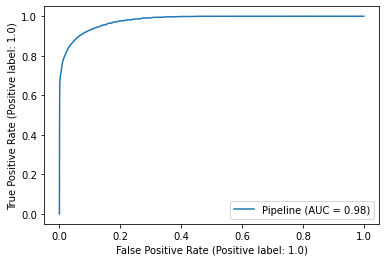

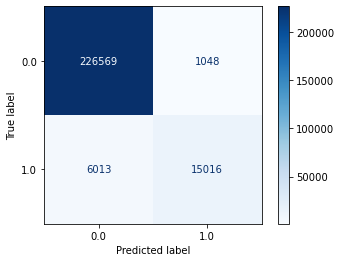

In [35]:
rf1_info.print_summary()

# Simple Model 4 - XGBoost

In [36]:
xg1 = ImPipeline(steps=[
    ('ct', ct_continous),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('xg1', XGBClassifier(random_state= 42) )
]).fit(X_simple, y_simple)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 
  f1_score is 0.054079986043874574 CV Results for `xg1` model:
            0.91023 ± 0.00056 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000021FA2D54190> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000021F8FD76D60>


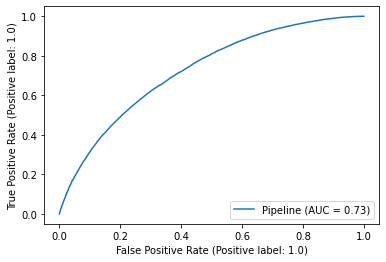

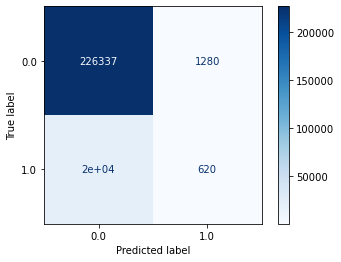

In [37]:
xg1_info = ModelWithCV(xg1, 'xg1', X_simple, y_simple)
xg1_info.print_summary()

# Grid Search on the Simple Models

In [38]:
### Logistic Regression

In [39]:
# log1_params = {
#     'log__C' : [10,100,1000],
#     'log__max_iter' : [10,20,30],
#     'log__penalty' : ['l1', 'l2'],
#     'log__solver' : ['saga', 'liblinear']
# }

In [40]:
# log_gs = GridSearchCV(estimator=log1, param_grid=log1_params, n_jobs=-1).fit(X_simple,y_simple)

In [41]:
# joblib.dump(log_gs, './joblib_models/log_gs.sav')

In [42]:
# log1_tune = ModelWithCV(log_gs.best_estimator_,'log1_tune', X_simple, y_simple)

In [43]:
# joblib.dump(log1_tune, './joblib_models/log1_tune.sav')

In [44]:
# log1_tune.print_summary()

### KNN

In [45]:
# knn_params = {
#     'knn1__n_neighbors': [5,10,20],
#     'knn1__metric' : ['minkowski', 'euclidean']
# }

In [46]:
# knn_gs = GridSearchCV(estimator=knn1, param_grid=knn_params, n_jobs=-1).fit(X_simple,y_simple)

In [47]:
# joblib.dump(knn_gs, './joblib_models/knn_gs.sav')

In [48]:
# knn1_tune = ModelWithCV(knn_gs.best_estimator_,'knn1_tune', X_simple, y_simple)

In [49]:
# joblib.dump(knn1_tune, './joblib_models/knn1_tune.sav')

In [50]:
# knn1_tune.print_summary()

### Decision Trees

In [51]:
# dtree1_params = {
#     'dtree__criterion' : ['gini', 'entropy'],
#     'dtree__max_depth' : [5,10,20],
#     'dtree__min_samples_split' : [1000, 10000, 50000]
# }

In [52]:
# dtree1_gs = GridSearchCV(estimator=dtree1, param_grid=dtree1_params, n_jobs=-1, verbose=3).fit(X_simple,y_simple)

In [53]:
# joblib.dump(dtree1_gs, './joblib_models/dtree1_gs.sav')

In [54]:
# dtree1_tune = ModelWithCV(dtree1_gs.best_estimator_,'dtree1_tune', X_simple, y_simple)
# dtree1_tune.print_summary()

In [55]:
# joblib.dump(dtree1_tune, './joblib_models/dtree1_tune.sav')

# Does only Categorical perform better?

In [56]:
X_categorical = X_train.drop(columns = continous)

In [57]:
y_categorical = y_train

In [58]:
log_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('log_cate',LogisticRegression(random_state=42))
]).fit(X_categorical, y_categorical)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [59]:
log_cate_info = ModelWithCV(log_cate, 'log_cate', X_categorical, y_categorical)

In [86]:
joblib.dump(log_cate_info, './joblib_models/log_cate_info.sav')

['./joblib_models/log_cate_info.sav']

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 
  f1_score is 0.3284908933217693 CV Results for `log_cate` model:
            0.90040 ± 0.00200 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000021FA2F04CA0> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000021FA2E1CEB0>


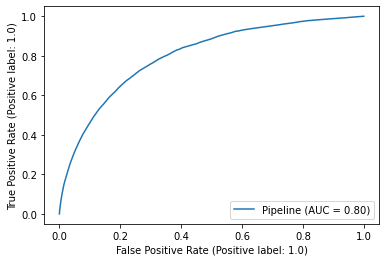

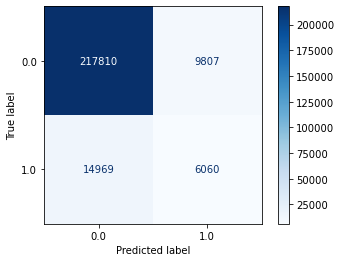

In [60]:
log_cate_info.print_summary()

In [61]:
log_pca_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('pca_cate', PCA(n_components=.9)),
    ('log_cate',LogisticRegression(random_state=42))
]).fit(X_categorical, y_categorical)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [62]:
log_pca_cate_info = ModelWithCV(log_pca_cate, 'log_pca_cate', X_categorical, y_categorical)

In [85]:
joblib.dump(log_pca_cate_info, './joblib_models/log_pca_cate_info.sav')

['./joblib_models/log_pca_cate_info.sav']

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 
  f1_score is 0.29486244971788017 CV Results for `log_pca_cate` model:
            0.89504 ± 0.00176 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000021FA2E259A0> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000021FA2F57DC0>


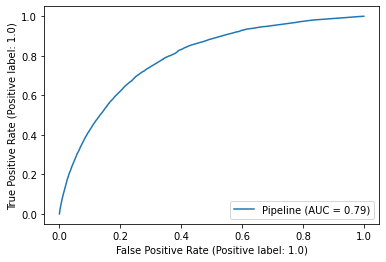

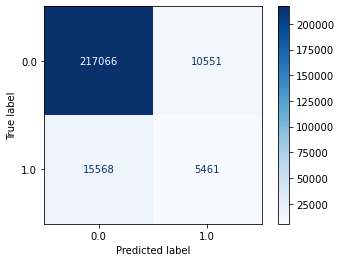

In [63]:
log_pca_cate_info.print_summary()

### KNN

In [64]:
knn_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('knn_cate',KNeighborsClassifier())
]).fit(X_categorical, y_categorical)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [65]:
knn_cate_info = ModelWithCV(knn_cate, 'knn_cate', X_categorical, y_categorical)

In [84]:
joblib.dump(knn_cate_info, './joblib_models/knn_cate_info.sav')

['./joblib_models/knn_cate_info.sav']

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 
  f1_score is 0.32518223989396955 CV Results for `knn_cate` model:
            0.90369 ± 0.00136 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000021FA3107DF0> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000021F8FAFFFD0>


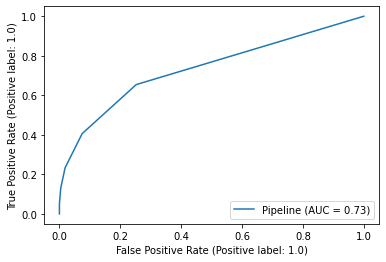

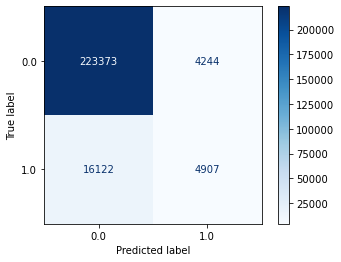

In [66]:
knn_cate_info.print_summary()

### Decision Tree/ RF

In [68]:
dtree_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('dtree', DecisionTreeClassifier(random_state=42) )
]).fit(X_categorical, y_categorical)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [69]:
dtree_cate_info = ModelWithCV(dtree_cate, 'dtree_cate', X_categorical, y_categorical)

In [83]:
joblib.dump(dtree_cate_info, './joblib_models/dtree_cate_info.sav')

['./joblib_models/dtree_cate_info.sav']

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 
  f1_score is 0.3866878923497432 CV Results for `dtree_cate` model:
            0.90045 ± 0.00119 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000021F8824EB80> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000021F8F682BE0>


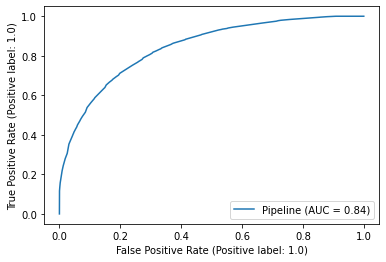

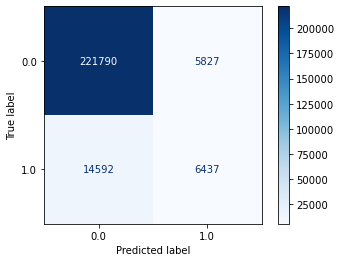

In [70]:
dtree_cate_info.print_summary()

In [71]:
rf_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('rf_cate', RandomForestClassifier(random_state=42) )
]).fit(X_categorical, y_categorical)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [72]:
rf_cate_info = ModelWithCV(rf_cate, 'rf_cate', X_categorical, y_categorical)

In [82]:
joblib.dump(rf_cate_info, './joblib_models/rf_cate_info.sav')

['./joblib_models/rf_cate_info.sav']

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 
  f1_score is 0.40099299065420557 CV Results for `rf_cate` model:
            0.90046 ± 0.00110 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000021FA2D794C0> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000021FA30E1D90>


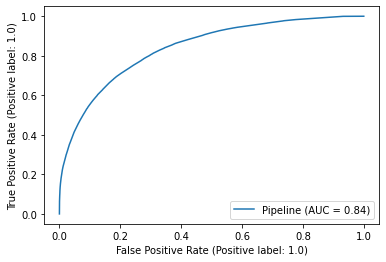

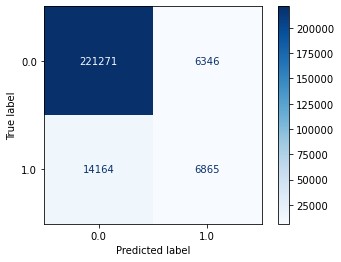

In [73]:
rf_cate_info.print_summary()

### XGBoost

In [74]:
xg_cate = ImPipeline(steps=[
    ('ct', ct_categorical),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('xg_cate', XGBClassifier(random_state= 42) )
]).fit(X_categorical, y_categorical)

C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\xiao\anaconda3\envs\phase5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 
  f1_score is 0.2941083457196167 CV Results for `xg_cate` model:
            0.90825 ± 0.00134 accuracy
         <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000021F93B813A0> <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x0000021FA314B0A0>


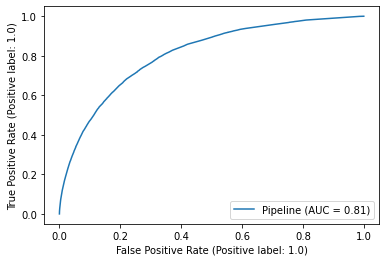

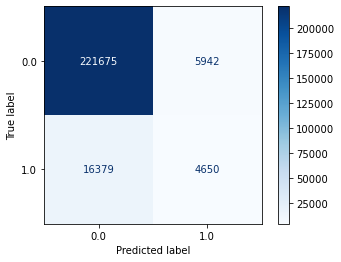

In [75]:
xg_cate_info = ModelWithCV(xg_cate, 'xg_cate', X_categorical, y_categorical)
xg_cate_info.print_summary()

In [76]:
joblib.dump(xg_cate_info, './joblib_models/xg_cate_info.sav')

['./joblib_models/xg_cate_info.sav']

### Gridsearch on the best model

In [88]:
rf_cate_params = {
    'rf__n_estimators' : [10 ,100,200],
    'rf__criterion' : ['gini', 'entropy'],
    'rf__max_depth' : [5,10,20,25],
    'rf__min_samples_split' : [100,500,1000]
}

In [ ]:
rf_cate_gs = GridSearchCV(estimator=rf_cate, param_grid=rf_cate_params, n_jobs=-1,verbose=3).fit(X_categorical,y_categorical)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [ ]:
joblib.dump(rf_cate_gs, './joblib_models/rf_cate_gs.sav')

In [ ]:
rf_cate_info = ModelWithCV(rf_cate_gs, 'rf_cate_gs', X_categorical, y_categorical)

rf_cate_info.print_summary()

# More data input into models

### Logistic Model

In [ ]:
log2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('log2',LogisticRegression(random_state=42, n_jobs= -1))
]).fit(X_train, y_train)

In [ ]:
joblib.dump(log2, './joblib_models/log2.sav')

In [ ]:
log2_info = ModelWithCV(log2, 'log2', X_train, y_train)

In [ ]:
joblib.dump(log2_info, './joblib_models/log2_info.sav')

In [ ]:
log2_info.print_summary()

### KNN

In [ ]:
knn2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy= 0.25, random_state=1)),
    ('knn2',KNeighborsClassifier( n_jobs= -1))
]).fit(X_train, y_train)

In [ ]:
joblib.dump(knn2, './joblib_models/knn2.sav')

In [ ]:
knn2_info = ModelWithCV(knn2, 'knn2', X_train, y_train)

In [ ]:
joblib.dump(knn2_info, './joblib_models/knn2_info.sav')

In [ ]:
knn2_info.print_summary()

### Decision Tree

In [ ]:
dtree2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('dtree2', DecisionTreeClassifier(random_state=42) )
]).fit(X_train, y_train)

In [ ]:
joblib.dump(dtree2, './joblib_models/dtree2.sav')

In [ ]:
dtree2_info = ModelWithCV(dtree2, 'dtree2', X_train, y_train)

In [ ]:
joblib.dump(dtree2_info, './joblib_models/dtree2_info.sav')

In [ ]:
dtree2_info.print_summary()

In [ ]:
rf2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('rf', RandomForestClassifier(random_state=42) )
]).fit(X_train, y_train)

In [ ]:
joblib.dump(rf2, './joblib_models/rf2.sav')

In [ ]:
rf2_info = ModelWithCV(rf2, 'rf2', X_train, y_train)

In [ ]:
joblib.dump(rf2_info, './joblib_models/rf2_info.sav')

### XGBoost

In [ ]:
xg2 = ImPipeline(steps=[
    ('ct', ct),
    ('sm', SMOTE(sampling_strategy=0.25, random_state=1)),
    ('xg2', XGBClassifier(random_state= 42) )
]).fit(X_train, y_train)

In [ ]:
joblib.dump(xg2, './joblib_models/xg2.sav')

In [ ]:
xg2_info = ModelWithCV(xg2, 'xg2', X_train, y_train)

In [ ]:
joblib.dump(xg2_info, './joblib_models/xg2_info.sav')

In [ ]:
xg2_info.print_summary()

# Grid search on these

In [ ]:
# log2_params = {
#     'log2__C' : [10,100,1000],
#     'log2__max_iter' : [10,20,30],
#     'log2__penalty' : ['l2', 'l1'],
#     'log2__solver' : ['saga', 'liblinear']
# }

In [ ]:
# log2_gs = GridSearchCV(estimator=log2, param_grid=log2_params, n_jobs=-1, verbose=2).fit(X_train,y_train)

In [ ]:
# joblib.dump(log2_gs, './joblib_models/log2_gs.sav')

In [ ]:
# log2_tune = ModelWithCV(log2_gs.best_estimator_,'log2_tune', X_train, y_train)

In [ ]:
# joblib.dump(log2_tune, './joblib_models/log2_tune.sav')

In [ ]:
# log2_tune.print_summary()

## KNN

In [ ]:
# knn2_params = {
#     'knn1__n_neighbors': [5,10,20],
#     'knn1__metric' : ['minkowski', 'euclidean']
# }

In [ ]:
# knn2_gs = GridSearchCV(estimator=knn2, param_grid=knn2_params, n_jobs=-1,verbose=2).fit(X_train,y_train)

In [ ]:
# joblib.dump(knn2_gs, './joblib_models/knn2_gs.sav')

In [ ]:
# knn2_tune = ModelWithCV(knn2_gs.best_estimator_,'knn2_tune', X_train, y_train)

In [ ]:
# joblib.dump(knn2_tune, './joblib_models/knn2_tune.sav')

In [ ]:
# knn2_tune.print_summary()

## Decision Tree

In [ ]:
# dtree2_params = {
#     'dtree2__criterion' : ['gini', 'entropy'],
#     'dtree2__max_depth' : [2,4,6],
#     'dtree2__min_samples_split' : [1000, 10000, 50000]
# }

In [ ]:
# dtree2_gs = GridSearchCV(estimator=dtree2, param_grid=dtree2_params, n_jobs=-1, verbose=2).fit(X_train,y_train)

In [ ]:
# joblib.dump(dtree2_gs, './joblib_models/dtree2_gs.sav')

In [ ]:
# dtree2_tune = ModelWithCV(dtree2_gs.best_estimator_,'dtree2_tune', X_train, y_train)

In [ ]:
# joblib.dump(dtree2_tune, './joblib_models/dtree2_tune.sav')

In [ ]:
# dtree2_tune.print_summary()